In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import math
from sklearn.cluster import AgglomerativeClustering
import seaborn  as sns
from scipy.cluster.hierarchy import fcluster
import plotly.graph_objects as go
from scipy.stats import mannwhitneyu,kruskal,ttest_ind,f_oneway
#import pickle
#import kaleido
import plotly.io as pio
pio.kaleido.scope.default_format = "pdf"
import plotly.express as px
from matplotlib.colors import ListedColormap
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import fastcluster

In [3]:
state = pd.read_csv('Agglo_C2_borders_states.bed',sep='\t',header=None)
stateM = state.iloc[:,3].to_numpy().reshape(int(len(state.index)/200),200)
def toIM(s):
    return int(s.strip('E'))
vIM = np.vectorize(toIM)
intstateM=vIM(stateM)

In [1]:
606+990+263+278==2137
#len(state.index)/200
#len(state.index)/200==len(tad.index)
#
#x_centered
#Vt.T[:,0].shape
#x2d.shape

True

In [14]:
def toIM(s):
    return int(s.strip('E'))
vIM = np.vectorize(toIM)
intstateM=vIM(stateM)
intstate_3dim = np.concatenate((np.expand_dims(intstateM,axis=-1),)*12,axis=-1)
x = np.zeros((1478, 200, 12))
y = np.copy(intstateM)
shape_last = x.shape[-1]
x.reshape((-1, shape_last))[np.arange(y.size), y.flatten()-1] = 1


# intstate_3dim[i,j,:]= vector(12) 


# stateMplot = sns.heatmap(intstateM,cmap=ListedColormap([(0,0,1),(0,0.6,0.8),(0.2,1,0.6),(0.4,0.2,0.6), (0.4,0.6,0.2),(0,0.4,0),(0.8,0,0.2),(1,0,0.8), (0.8,0.6,1),(0.8,0.8,0.4),(1,1,0),(1,1,0.8)]),xticklabels=100,yticklabels=False).get_figure()
# stateMplot.savefig('state_Cluster2.pdf',bbox_inches='tight')

In [17]:
#x_centered = x-x.mean(axis=0)
U, V, Vt = np.linalg.svd(x_centered)

c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

x2d = x_centered.dot(Vt.T[:,:13])

# fig = plt.figure()

# ax =fig.add_subplot()
# plt.scatter(x2d[:,0],x2d[:,1],s=0.1)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.title.set_text('projected to a 2D space')

# plt.show()

#plt.savefig('../results/cluster2_pca.pdf')

In [23]:
from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(x)
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

In [6]:
def O_Os(A,B):
    upper = sum(A==B)
    lower = math.sqrt(len(A)*len(B))
    return upper/lower

In [42]:
# #simM = distance.cdist(stateM,stateM,O_Os)
# simM = np.load('Agglo_Cluster1_sim.npy')
# OOdist = sns.heatmap(simM,center=0.5,cmap='vlag',cbar_kws={'label':'Otsuka-Ochiai coefficient'},xticklabels=False, yticklabels=False)
# OOdist.set_xlabel('TAD boundaries')
# OOdist.set_ylabel('TAD boundaries')
# OOdist.get_figure().savefig('Type1_OOC.pdf',bbox_inches='tight')                  
# #np.save('Agglo_Cluster1_sim.npy',simM)
# distM = np.load('Agglo_Cluster1_dist.npy')
# seq = np.concatenate([np.where(y_pred.labels_==0)[0],np.where(y_pred.labels_==1)[0],np.where(y_pred.labels_==2)[0]])
# idx = np.empty_like(seq)
# idx[seq] = np.arange(len(seq))
#a = distM[:, idx]
b = a[idx,:]


In [2]:
# def O_O(A,B):
#     upper = sum(A==B) 
#     lower = math.sqrt(len(A)*len(B))
#     return 1-upper/lower
# distM = distance.cdist(stateM,stateM,O_O)
# np.save('Agglo_Cluster2_dist.npy',distM)
distM = np.load('Agglo_Cluster2_dist.npy')
clustering = AgglomerativeClustering(linkage='complete', n_clusters=2,affinity='precomputed')
y_pred = clustering.fit(distM)
from collections import Counter
Counter(y_pred.labels_)
simplet1 = intstateM[y_pred.labels_==0,:]
simplet2 = intstateM[y_pred.labels_==1,:]
# # # simplet3 = distM[y_pred.labels_==2,:]
simplesort = np.concatenate((simplet1,simplet2),axis=0)
stateMplot = sns.heatmap(simplesort,cmap=ListedColormap([(0,0,1),(0,0.6,0.8),(0.2,1,0.6),(0.4,0.2,0.6), (0.4,0.6,0.2),(0,0.4,0),(0.8,0,0.2),(1,0,0.8), (0.8,0.6,1),(0.8,0.8,0.4),(1,1,0),(1,1,0.8)]),xticklabels=100,yticklabels=['A2','A1'])
#stateMplot.set_yticks([353-1,353+678-1])
#stateMplot.get_figure().savefig('I1I2.pdf',bbox_inches='tight')
#sns.heatmap(b,cmap='vlag')
# fig = go.Figure(data=go.Heatmap(
#                     z=simplesort,colorscale='Reds'))
# fig.update_layout(template='simple_white',title_text='Agglomerative Cluster',xaxis = dict(showgrid=False,ticks='inside',mirror=True,
#                                                                                    showline=True),
#                 yaxis = dict(showgrid=False, ticks='outside',mirror=True,showline=True,tickmode = 'array',tickvals = [944,944+534],
#                             ticktext = ['P1','P2']),
#                 font=dict(size=18),
#                  title_x=0.5,
#                  showlegend=False)
                  
# fig.write_image('AggloCluster1_2.pdf')

NameError: name 'intstateM' is not defined

In [42]:
tad.head()

,chr,start,end,type
0,chr10,3960000,4000000,0
1,chr10,5400000,5440000,1
2,chr10,11280000,11320000,0
3,chr10,13000000,13040000,0
4,chr10,20280000,20320000,0


In [49]:
# boundary included?
tad = pd.DataFrame()
tad_chr = state.iloc[0::200,0].reset_index(drop=True)
tad_start = state.iloc[0::200,1].reset_index(drop=True)
tad_end = state.iloc[199::200,2].reset_index(drop=True)
tad['chr'] = tad_chr
tad['start'] = tad_start
tad['end'] = tad_end
tad['type'] = y_pred.labels_
tad.to_csv('Agglo_C2_borders_type.bed',header=False,sep='\t',quoting=3,index=False)
# tad.head()
#state


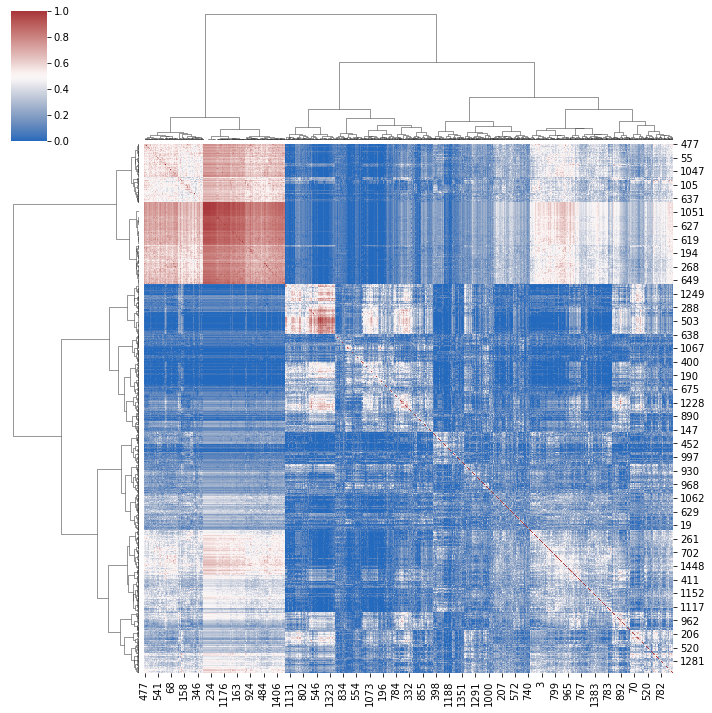

In [5]:
hcdefault = sns.clustermap(simM, cmap="vlag",method='ward')

In [5]:
hcdefault.savefig('AggloCluster1_hcward.pdf',bbox_inches='tight')

In [6]:
lkg = hcdefault.dendrogram_row.linkage
c = fcluster(lkg,t=3,criterion='maxclust')
np.savetxt('AggloCluster1_stateclusters.txt', c)

In [7]:
boundaries = pd.read_csv('Agglo_C1_borders.bed',sep='\t',header=None)

In [8]:
boundaries['cluster'] = c

In [9]:
boundaries.to_csv('Agglo_C1_borders_Cluster.bed',sep='\t',header=False,index=False)

In [10]:
C1_borders = pd.read_csv('Agglo_C1_borders_Cluster.bed',sep='\t',header=None)
C1_1 = C1_borders.loc[C1_borders.iloc[:,3]==1,:2]
C1_2 = C1_borders.loc[C1_borders.iloc[:,3]==2,:2]
C1_3 = C1_borders.loc[C1_borders.iloc[:,3]==3,:2]
C1_1.to_csv('C1_borders_Cluster1.bed',sep='\t',header=False,index=False)
C1_2.to_csv('C1_borders_Cluster2.bed',sep='\t',header=False,index=False)
C1_3.to_csv('C1_borders_Cluster3.bed',sep='\t',header=False,index=False)

In [14]:
C2_borders = pd.read_csv('Agglo_C2_borders_Cluster.bed',sep='\t',header=None)
C2_1 = C2_borders.loc[C2_borders.iloc[:,3]==1,:2]
C2_2 = C2_borders.loc[C2_borders.iloc[:,3]==2,:2]
C2_3 = C2_borders.loc[C2_borders.iloc[:,3]==3,:2]
C2_1.to_csv('C2_borders_Cluster1.bed',sep='\t',header=False,index=False)
C2_2.to_csv('C2_borders_Cluster2.bed',sep='\t',header=False,index=False)
C2_3.to_csv('C2_borders_Cluster3.bed',sep='\t',header=False,index=False)

In [24]:
c11_tad = pd.read_csv('../cluster1/C1_borders_Cluster1.bed',header=None,sep='\t')
c12_tad = pd.read_csv('../cluster1/C1_borders_Cluster2.bed',header=None,sep='\t')
c13_tad = pd.read_csv('../cluster1/C1_borders_Cluster3.bed',header=None,sep='\t')
c3_tad = pd.read_csv('../aggloCluster3/Agglo_C3_borders.bed',header=None,sep='\t')
c21_tad = pd.read_csv('../cluster1/C2_borders_Cluster1.bed',header=None,sep='\t')
c22_tad = pd.read_csv('../cluster1/C2_borders_Cluster1.bed',header=None,sep='\t')
c23_tad = pd.read_csv('../cluster1/C2_borders_Cluster1.bed',header=None,sep='\t')

chromosome = ['chr'+ i for i in [str(i) for i in range(1,20)]]
chromosome.append('chrX')
def to_tads(cluster,name):
#C1 = data_not_out.loc[labels==0,:]
    for chrom in chromosome:
        data_chr = cluster.loc[cluster.iloc[:,0]==chrom,1:].to_numpy().flatten()[1:-1]
        tad_chr = data_chr.reshape((-1,2))
        with open(f'{name}_tads.bed','a') as fo:
            for i in range(tad_chr.shape[0]):
                fo.write(f'{chrom}\t{tad_chr[i,0]}\t{tad_chr[i,1]}\n')

In [25]:
list(map(to_tads,[c11_tad,c12_tad,c13_tad,c21_tad,c22_tad,c23_tad,c3_tad],['P1','P2','P3','P4','P5','P6','P7']))

[None, None, None, None, None, None, None]

5
7
9


[None, None, None]